In [1]:
#%matplotlib inline

import json
import oandapyV20
from oandapyV20 import API
from oandapyV20.exceptions import V20Error
import configparser
import oandapyV20.endpoints.pricing as pricing
import matplotlib.pyplot as plt

**Prepare a Configuration File in the YAML Syntax**
1. Create a sub-directory, called "Config", under which this Python code resides
2. Create a text file, called "config_v20.txt", and put the following lines in it 

`
[oanda]
account_id = 900-143-990943298-761 
api_key = r9u32ijlojelkfdslkfd-093ifdhfoiewyorhfkjdsfs21321h3io34
`

(Both of them are given after sign-up with OANDA)

In [2]:
#Better NOT to embed API Key in the code, rather read that off a text file (config_v20.txt)
config = configparser.ConfigParser()
config.read('./Config/config_v20.txt')
account_id = config['oanda']['account_id']
api_key = config['oanda']['api_key']

api = oandapyV20.API(access_token=api_key)

**Get Current Price**

In [3]:
params ={  
          "instruments": "EUR_USD,EUR_JPY"  
        } 

r = pricing.PricingInfo(accountID=account_id, params=params)
rv = api.request(r)
print(r.response)

{'time': '2019-04-19T12:23:24.444294166Z', 'prices': [{'type': 'PRICE', 'time': '2019-04-19T12:19:00.741844418Z', 'bids': [{'price': '1.12444', 'liquidity': 10000000}], 'asks': [{'price': '1.12458', 'liquidity': 10000000}], 'closeoutBid': '1.12429', 'closeoutAsk': '1.12473', 'status': 'tradeable', 'tradeable': True, 'unitsAvailable': {'default': {'long': '3280710', 'short': '3280710'}, 'openOnly': {'long': '3280710', 'short': '3280710'}, 'reduceFirst': {'long': '3280710', 'short': '3280710'}, 'reduceOnly': {'long': '0', 'short': '0'}}, 'quoteHomeConversionFactors': {'positiveUnits': '1.35521000', 'negativeUnits': '1.35540000'}, 'instrument': 'EUR_USD'}, {'type': 'PRICE', 'time': '2019-04-19T12:20:57.752390668Z', 'bids': [{'price': '125.840', 'liquidity': 10000000}], 'asks': [{'price': '125.863', 'liquidity': 10000000}], 'closeoutBid': '125.840', 'closeoutAsk': '125.863', 'status': 'tradeable', 'tradeable': True, 'unitsAvailable': {'default': {'long': '3280710', 'short': '3280710'}, 'op

**Get Streaming Price**

In [4]:
instruments = "USD_JPY"
s = pricing.PricingStream(accountID=account_id, params={"instruments":instruments})
try:
    n = 0
    maxrecs = 5
    for R in api.request(s):
        print(json.dumps(R, indent=2))
        n += 1
        if n > maxrecs:
            #s.terminate("maxrecs received: {}".format(MAXREC))
            s.terminate("maxrecs received")

except V20Error as e:
    print("Error: {}".format(e))

{
  "type": "PRICE",
  "time": "2019-04-19T12:23:24.787613394Z",
  "bids": [
    {
      "price": "111.921",
      "liquidity": 10000000
    }
  ],
  "asks": [
    {
      "price": "111.936",
      "liquidity": 10000000
    }
  ],
  "closeoutBid": "111.906",
  "closeoutAsk": "111.951",
  "status": "tradeable",
  "tradeable": true,
  "instrument": "USD_JPY"
}
{
  "type": "HEARTBEAT",
  "time": "2019-04-19T12:23:37.188465808Z"
}
{
  "type": "HEARTBEAT",
  "time": "2019-04-19T12:23:42.193073720Z"
}
{
  "type": "HEARTBEAT",
  "time": "2019-04-19T12:23:47.199833264Z"
}
{
  "type": "PRICE",
  "time": "2019-04-19T12:23:49.703141525Z",
  "bids": [
    {
      "price": "111.918",
      "liquidity": 10000000
    }
  ],
  "asks": [
    {
      "price": "111.935",
      "liquidity": 10000000
    }
  ],
  "closeoutBid": "111.903",
  "closeoutAsk": "111.950",
  "status": "tradeable",
  "tradeable": true,
  "instrument": "USD_JPY"
}
{
  "type": "HEARTBEAT",
  "time": "2019-04-19T12:23:52.205050068Z"


StreamTerminated: maxrecs received

**Get Historical Price**

In [5]:
import oandapyV20.endpoints.instruments as instruments

#must be in the ISO8601 format
from_date = "2014-11-30T00:00:00.000000Z"
to_date = "2018-11-30T00:00:00.000000Z"

params ={
           "granularity": "D",
           "from": from_date,
           "to": to_date
        }
r = instruments.InstrumentsCandles(instrument="USD_JPY",
                                   params=params)
api.request(r)
dict = r.response

**Plot a Line Chart**

In [6]:
#If we don't cast to float from string, pyplot automatically sort y-value!
y_value_list = [float(dict["candles"][i]["mid"]['c']) for i in range(len(dict["candles"]))]

x_value_list = [dict["candles"][i]["time"][0:10] for i in range(len(dict["candles"]))]

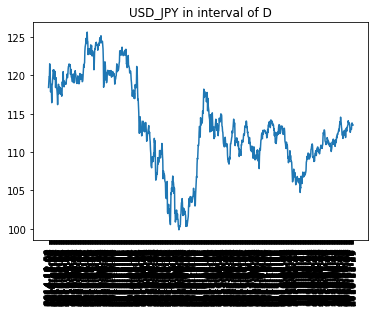

In [7]:
plt.title(dict["instrument"] + " in interval of " + dict["granularity"])
plt.plot(x_value_list, y_value_list)
plt.xticks(rotation='vertical')
plt.show()

**Plot a Candle Stick Chart**

In [8]:
import matplotlib.dates as mdates
import datetime
from mpl_finance import candlestick_ohlc

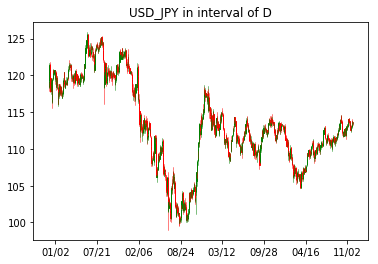

In [9]:
time_values, open_values, high_values, low_values, close_values = [],[],[],[],[]
  
for i in range(len(dict["candles"])):
    time_values.append(mdates.date2num(datetime.datetime(int(dict["candles"][i]["time"][0:4]), 
                                                 int(dict["candles"][i]["time"][5:7]),
                                                 int(dict["candles"][i]["time"][8:10]),
                                                 0,
                                                 0)))
    open_values.append(float(dict["candles"][i]["mid"]['o']))
    high_values.append(float(dict["candles"][i]["mid"]['h']))
    low_values.append(float(dict["candles"][i]["mid"]['l']))
    close_values.append(float(dict["candles"][i]["mid"]['c']))

#zip 'takes iterable elements as input, and returns iterator'
ohlc = zip(time_values, open_values, high_values, low_values, close_values)

ax = plt.subplot()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

candlestick_ohlc(ax, ohlc, width=0.7, colorup='g', colordown='r')

plt.title(dict["instrument"] + " in interval of " + dict["granularity"])
plt.show()

In [ ]:
#Tried a tuple to pass to 'candlestick_ohlc', but doesn't work!
#quotes = [tuple([mdates.date2num(datetime.datetime(int(dict["candles"][i]["time"][0:4]),
#                                                  int(dict["candles"][i]["time"][5:7]),
#                                                  int(dict["candles"][i]["time"][8:10]), 0, 0)),
#                float(dict["candles"][i]["mid"]['o']),
#                float(dict["candles"][i]["mid"]['h']),
#                float(dict["candles"][i]["mid"]['l']),
#                float(dict["candles"][i]["mid"]['c'])]) for i in range(len(dict["candles"]))]
#
#candlestick_ohlc(ax, quotes, width=0.6)